In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data=pd.read_csv("/content/lab-7.zip")


In [19]:
# Drop rows with missing target values
data = data.dropna(subset=['Patient_Status'])

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status', 'Surgery_type']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Handle missing values in the dataset (e.g., replace with mean)
data.fillna(data.mean(), inplace=True)

# Drop date columns from the DataFrame
data.drop(columns=['Date_of_Surgery', 'Date_of_Last_Visit'], inplace=True)

# Split the data into features and target
X = data.drop(columns=['Patient_Status'])
y = data['Patient_Status']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


<ipython-input-19-685f2525e419>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-19-685f2525e419>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
<ipython-input-19-685f2525e419>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


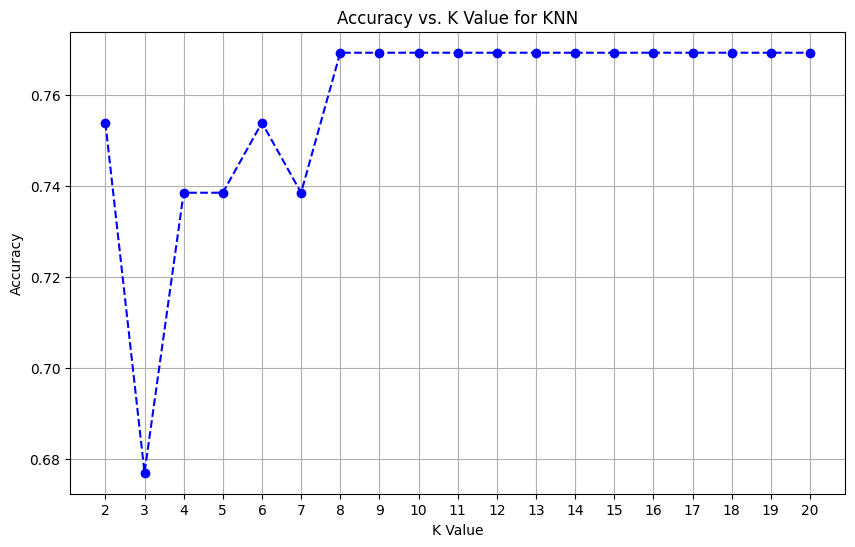

In [24]:
# Train K-Nearest Neighbors (KNN) classifier for different K values
k_values = list(range(2, 21))
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='--', color='b')
plt.title('Accuracy vs. K Value for KNN')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


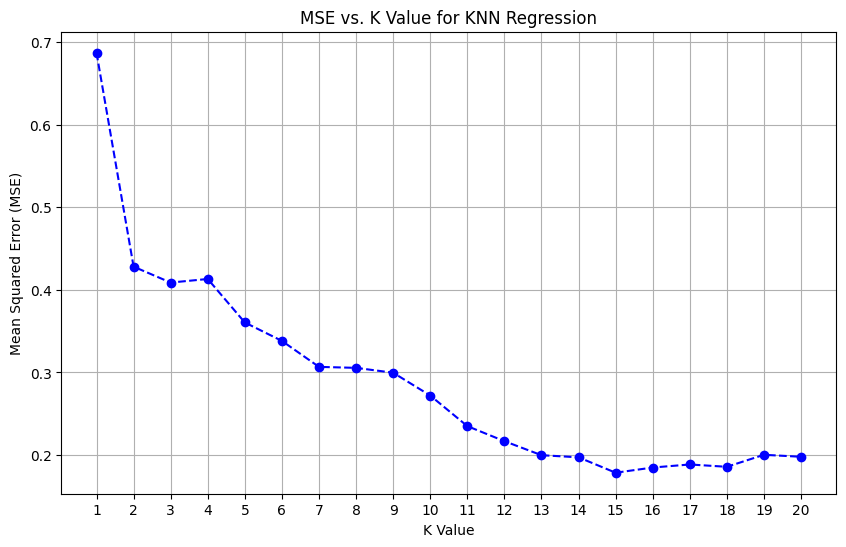

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('/content/Japan_life_expectancy.csv')

# Separate features and target variable
X = data.drop(columns=['Prefecture'])  # Exclude the 'Prefecture' column as it's not needed
y = data['Life_expectancy']  # Target variable (Life Expectancy in this case)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store MSE values for different K values
k_values = list(range(1, 21))
mse_values = []

# Train KNN regressor for different K values and calculate MSE
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the graph of MSE against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title('MSE vs. K Value for KNN Regression')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [26]:
print("The Minimum Error is at k==15")

The Minimum Error is at k==15
